<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Sources_and_types_of_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Referencia: https://sporco.readthedocs.io/en/latest/_modules/sporco/metric.html

import numpy as np
import pandas as pd
import scipy.stats
import skimage
from skimage import io, data, util, metrics
from matplotlib import pyplot as plt

In [ ]:
def mse(vref, vcmp):
"""
Calculates the mean square error (MSE) between two images.

Parameters
----------
vref : Reference image. Vector type.
vcmp : Comparison image. Vector type.

Returns
-------
The MSE between 'vref' and 'vcmp' ​​in float.
"""
    r = np.asarray(vref, dtype=np.float64).ravel()
    c = np.asarray(vcmp, dtype=np.float64).ravel()
    return np.mean(np.abs(r - c)**2)

def snr(vref, vcmp):
  """
Calculates the signal-to-noise ratio (SNR) of two images.

Parameters
----------
vref : Reference image. Type vector.
vcmp : Comparison image. Type vector.

Returns
-------
The SNR of 'vcmp' ​​with respect to 'vref' in float..
"""

    dv = np.var(vref)
    with np.errstate(divide='ignore'):
        rt = dv / mse(vref, vcmp)
    return 10.0 * np.log10(rt)

def entropy(image):
   """
Calculates the entropy of the data.

Parameters
----------
image : Image to concatenate.

Returns
-------
The entropy of 'image' in float.
"""
    data_1d = np.concatenate(image)
    pd_series = pd.Series(data_1d)
    counts_data = pd_series.value_counts()
    entropy = scipy.stats.entropy(counts_data)
    return entropy

def psnr(vref, vcmp, rng=None):
    """
    Compute Peak Signal to Noise Ratio (PSNR) of two images. The PSNR
    calculation defaults to using the less common definition in terms
    of the actual range (i.e. max minus min) of the reference signal
    instead of the maximum possible range for the data type
    (i.e. :math:`2^b-1` for a :math:`b` bit representation).

    Parameters
    ----------
    vref : array_like
      Reference image
    vcmp : array_like
      Comparison image
    rng : None or int, optional (default None)
      Signal range, either the value to use (e.g. 255 for 8 bit samples) or
      None, in which case the actual range of the reference signal is used

    Returns
    -------
    x : float
      PSNR of `vcmp` with respect to `vref`
    """

    if rng is None:
        rng = vref.max() - vref.min()
    dv = (rng + 0.0)**2
    with np.errstate(divide='ignore'):
        rt = dv / mse(vref, vcmp)
    return 10.0 * np.log10(rt)

def entropy(data):
    """Calculates entropy of the passed 'pd.Series'.
    """
    pd_series = pd.Series(data)
    counts_data = pd_series.value_counts()      # counts occurrence of each value
    entropy = scipy.stats.entropy(counts_data)  # get entropy from counts
    return entropy

# Example - SNR y MSE

Calculate the Signal to Noise Ratio and Root Mean Square Error of the reference and capture images.

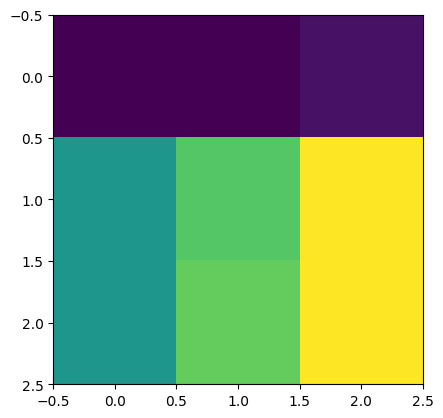

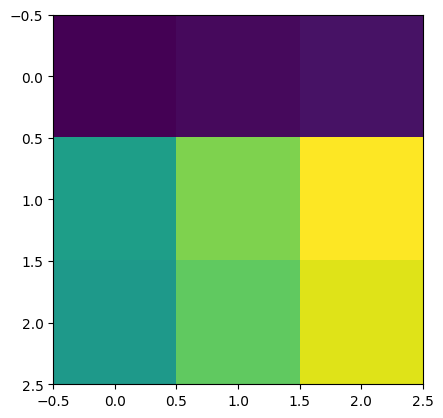

In [ ]:
referencia = np.array([
    [123, 123, 125],
    [145, 154, 165],
    [145, 155, 165]
    ])

captura = np.array([
    [123, 124, 125],
    [146, 156, 164],
    [145, 154, 162]
    ])
plt.imshow(referencia)
plt.show()
plt.imshow(captura)
plt.show()



In [ ]:
resultado_snr = snr(referencia, captura)
print(f'SNR: {resultado_snr}')

resultado_mse = mse(referencia, captura)
print(f'MSE: {resultado_mse}')

SNR: 21.399202225113218
MSE: 1.8888888888888888


We convert the reference and capture matrices into one-dimensional arrays.

In [ ]:
referencia_1d=np.concatenate(referencia)
captura_1d=np.concatenate(captura)


Confirming that the images were converted to 1 dimension.

In [ ]:
referencia_1d.shape

(9,)

We calculate the entropy for each arrangement.

In [ ]:
print(f'Entropía de referencia: {entropy(referencia_1d)}')  # Entropía para Referencia
print(f'Entropía de captura:    {entropy(captura_1d)}')     # Entropía para Captura
print(f'Aumento de entropía:    {entropy(captura_1d) - entropy(referencia_1d)}')

Entropía de referencia: 1.7351264569629228
Entropía de captura:    2.1972245773362196
Aumento de entropía:    0.4620981203732968


# Excersie 1 - SNR y MSE

Calculate the Signal to Noise Ratio and Root Mean Square Error of the reference and capture images.

In [ ]:
referencia_A = np.array([
    [2, 2, 2, 8, 8],
    [2, 2, 2, 8, 8],
    [2, 2, 2, 8, 8],
    [4, 4, 4, 6, 6],
    [4, 4, 4, 6, 6]
    ])

referencia_B = np.array([
    [3.0, 2.8, 2.9, 9.0, 8.8],
    [3.0, 3.0, 3.0, 8.8, 9.0],
    [3.0, 2.9, 2.8, 9.0, 9.0],
    [5.0, 5.0, 5.0, 7.0, 6.9],
    [5.0, 5.0, 5.0, 6.7, 7.0]
    ])

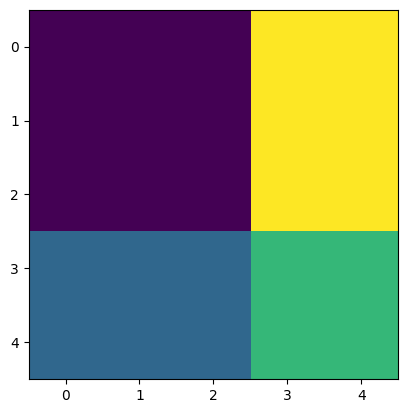

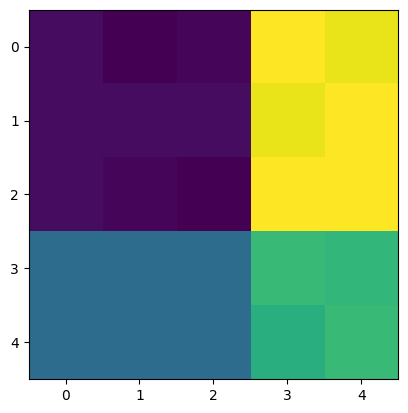

In [ ]:
plt.imshow(referencia_A)
plt.show()
plt.imshow(referencia_B)
plt.show()

# SNR and MSE calculation in images

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import skimage
from skimage import io, data, util
from matplotlib import pyplot as plt

In [ ]:
resultado_snr = snr(referencia_A, referencia_B)
print(f'SNR: {resultado_snr}')

resultado_mse = mse(referencia_A, referencia_B)
print(f'MSE: {resultado_mse}')

referencia_A=np.concatenate(referencia_A)
referencia_B=np.concatenate(referencia_B)


SNR: 21.399202225113218
MSE: 1.8888888888888888


ValueError: zero-dimensional arrays cannot be concatenated

## Gaussian noise

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import skimage
from skimage import io, data, util
from matplotlib import pyplot as plt

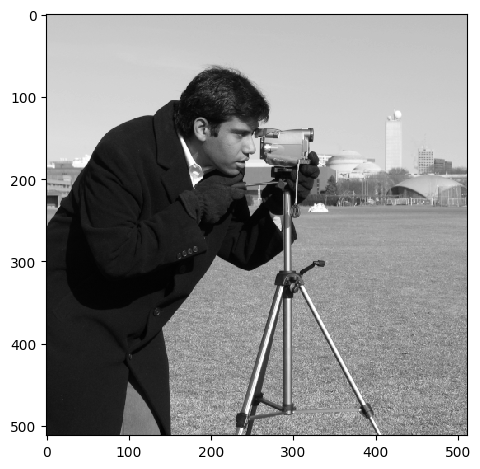

In [ ]:
astro=data.camera()
io.imshow(astro)
plt.show()

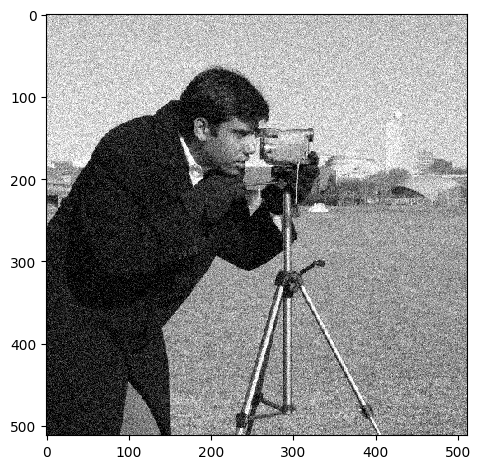

SNR: -6.063110345854959
MSE: 21907.648178126357


In [ ]:
astro_n=util.random_noise(astro,mode='gaussian')
io.imshow(astro_n)
plt.show()

astro_snr = snr(astro, astro_n)
print(f'SNR: {astro_snr}')

astro_mse = mse(astro, astro_n)
print(f'MSE: {astro_mse}')

In [ ]:
astro_1d = np.concatenate(astro)
astro_n_1d = np.concatenate(astro_n)

In [ ]:
print(f'Entropía de astro: {entropy(astro_1d)}')  # Entropía para Referencia
print(f'Entropía de astro_2: {entropy(astro_n_1d)}')        # Entropía para Captura
print(f'Aumento de entropía: {entropy(astro_n_1d) - entropy(astro_1d)}')

Entropía de astro: 5.012629007582685
Entropía de astro_2: 11.857483372669728
Aumento de entropía: 6.844854365087043


## Gaussian Noise with Mean and Variance

In [ ]:
astro_n2=util.random_noise(astro,mode='gaussian', mean=0.1,var=0.02)

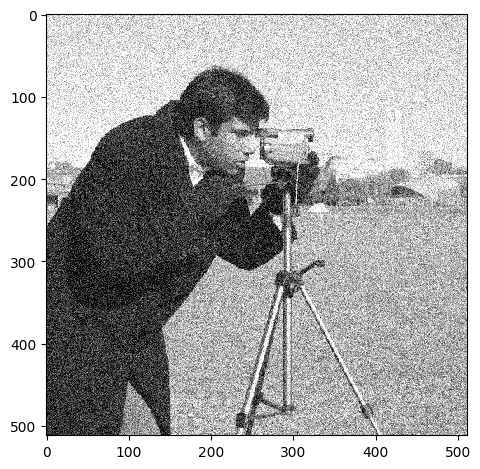

In [ ]:
io.imshow(astro_n2)
io.show()

In [ ]:
astro_snr2 = snr(astro, astro_n2)
print(f'SNR: {astro_snr2}')

astro_n2_mse = mse(astro, astro_n2)
print(f'MSE: {astro_n2_mse}')

SNR: -6.058606816905071
MSE: 21884.942250543667


In [ ]:
astro_n2_1d = np.concatenate(astro_n2)

In [ ]:
print(f'Entropía de astro: {entropy(astro_1d)}')        # Entropía para Referencia
print(f'Entropía de astro_n2: {entropy(astro_n2_1d)}')  # Entropía para Captura
print(f'Aumento de entropía: {entropy(astro_n2_1d) - entropy(astro_1d)}')

Entropía de astro: 5.012629007582685
Entropía de astro_n2: 11.327938526278768
Aumento de entropía: 6.315309518696083



Using the astronaut image, add to the image any other type of noise available in the `random_noise` function and calculate the SNR, MSE, entropy of each image and the respective magnification.

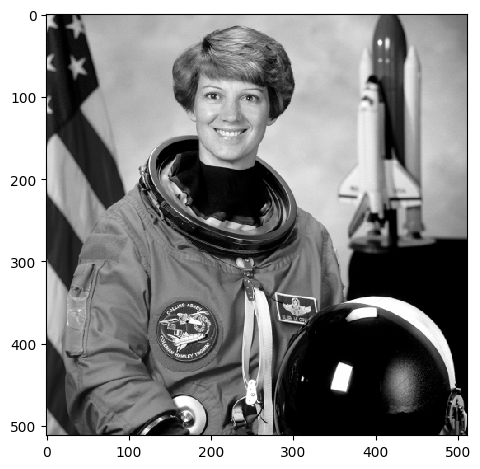

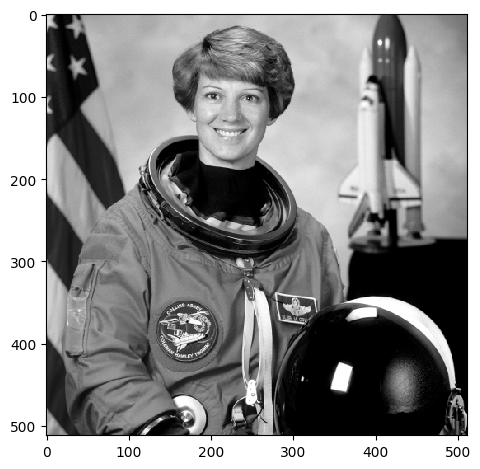

SNR: 44.14058191084571
MSE: 3.3670350075510413e-06
Entropía de astronauta: 10.232778654968948
Entropía de astronauta_2: 10.471448235070026
Aumento de entropía: 0.23866958010107808


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import skimage
from skimage import io, data, util
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import io
from skimage import color
from skimage import img_as_float

astronauta = color.rgb2gray(data.astronaut())
io.imshow(astronauta)
plt.show()



astronauta_n=util.random_noise(astronauta,mode='poisson' )
io.imshow(astronauta_n)
plt.show()



astronauta_snr = snr(astronauta, astronauta_n)
print(f'SNR: {astronauta_snr}')

astronauta_mse = mse(astronauta, astronauta_n)
print(f'MSE: {astronauta_mse}')

astronauta_1d = np.concatenate(astronauta)
astronauta_n_1d = np.concatenate(astronauta_n)

print(f'Entropía de astronauta: {entropy(astronauta_1d)}')  # Entropía para Referencia
print(f'Entropía de astronauta_2: {entropy(astronauta_n_1d)}')        # Entropía para Captura
print(f'Aumento de entropía: {entropy(astronauta_n_1d) - entropy(astronauta_1d)}')

## Referencias

[1] [Página](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise) función `random_noise`